## **训练 Traning**

In [ ]:
# run_sb3.py  Simplification
from tools.train import QuadrupedTrainer

train = QuadrupedTrainer(algorithm       = "SAC",                     # algorithm: "SAC", "PPO"
                         num_envs        = 1,                         # num_envs
                         load_last_train = False,                     # was load_nn
                         load_dir        = "112624231523_cpg_PPO_noise_FWD_60k",                    
                        )    

train.set_env_config(motor_control_mode     ="CPG",             # Motor control mode
                     task_env               ="FWD_LOCOMOTION",  # Task
                     observation_space_mode ="LR_COURSE_OBS",   # Observation space 
                     add_noise              = True,
                     terrain                = None,             # None, "RANDOM"
                     EPISODE_LENGTH         = 15,               # Add for test
                     render                 = False,            # Set true to check if everything is correct
                     )

train.train(total_timesteps=1000000)                            # maximum training timesteps
train.save_model()


Using device: cuda


c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


=========================== Random Mass:
Mass: 6.031134810647424 location: [0.111 0.0251 -0.0432]
ground friction coefficient is 0.7765354127212973


c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cuda device
=========================== Random Mass:
Mass: 7.901272482179044 location: [-0.133 0.0177 -0.00436]
ground friction coefficient is 0.7947816769354599
=========================== Random Mass:
Mass: 4.661662370919637 location: [-0.145 -0.0269 -0.0192]
ground friction coefficient is 0.5231560596784651
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90       |
|    ep_rew_mean     | 0.075    |
| time/              |          |
|    episodes        | 1        |
|    fps             | 14       |
|    time_elapsed    | 6        |
|    total_timesteps | 90       |
---------------------------------
=========================== Random Mass:
Mass: 3.412161932910454 location: [0.137 0.0488 -0.0251]
ground friction coefficient is 0.6684753895423012


error: Not connected to physics server.

## **测试 Simulation Test**

In [ ]:
# Implemented observation spaces for deep reinforcement learning: 
#   "DEFAULT":    motor angles and velocities, body orientation
#   "LR_COURSE_OBS":  [#0000FF TODO: what should you include? what is reasonable to measure on the real system? CPG states?] 

# Tasks to be learned with reinforcement learning
#     - "FWD_LOCOMOTION"
#         reward forward progress only
#     - "FLAGRUN"
#         move to goal, once reached, a new goal is randomly selected.
#     - "LR_COURSE_TASK" 
#         [#0000FF TODO: what should you train for?]
#         Ideally we want to command A1 to run in any direction while expending minimal energy
#         How will you construct your reward function? 

# Motor control modes:
#   - "TORQUE": 
#         supply raw torques to each motor (12)
#   - "PD": 
#         supply desired joint positions to each motor (12)
#         torques are computed based on the joint position/velocity error
#   - "CARTESIAN_PD": 
#         supply desired foot positions for each leg (12)
#         torques are computed based on the foot position/velocity error
#   - "CPG": 
#         supply desired CPG state modulations (8), mapped to foot positions
#         torques are computed based on inverse kinematics + joint PD (or you can add Cartesian PD)

# Terrain types:
#   -  None
#   - "SLOPES":
#   - "STAIRS":
#   - "GAPS":
#   - "RANDOM":

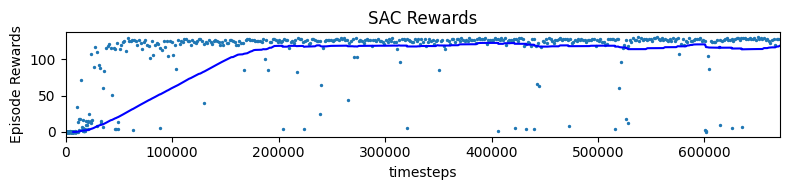

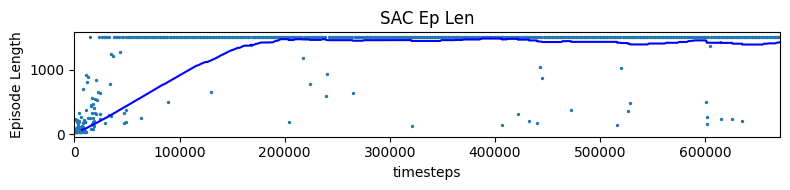

In [1]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings
test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/120224231951")

test.set_env_config(render=True, 
                    record_video=False, 
                    motor_control_mode="CPG", 
                    task_env="FLAGRUN", #"FWD_LOCOMOTION",  
                    observation_space_mode="LR_COURSE_OBS",
                    terrain="RANDOM",  #None, 
                    add_noise=False,
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()      # run simulation
